### Titanic - Machine Learning from Disaster
### Predict survival on the Titanic and get familiar with ML basics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df = pd.read_csv("test.csv")
test_df.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### train_df has an extra col: Survived
* sibsp: 	# of siblings / spouses aboard the Titanic
* parch	    # of parents / children aboard the Titanic
* ticket	Ticket number
* cabin	    Cabin number
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train_df.set_index(train_df.PassengerId, inplace=True)
train_df.drop('PassengerId', axis = 1, inplace = True)

In [6]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
test_df = pd.read_csv("test.csv", index_col="PassengerId")
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 1. Feature classification: Categorical vs Numerical
* Select the appropriate plots for visualization
* Categorical(like Pclass) has some features: nominal, ordinal, ratio, interval
* Numerical has some features: discreate, continuous, timeseries

In [8]:
train_df.info()
#many missing vals

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
* Numerical: (continuous) Age, Fare (discrete)
* Mix types of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various data type: String, int, float

### Change datatype of some fields 

In [10]:
train_df["Survived"] = train_df["Survived"].astype("category")
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [12]:
converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"] 
def convert_cat(df, features): 
    for feature in features:
        df[feature] = df[feature].astype("category")       
convert_cat(train_df, converted_features)
convert_cat(test_df, converted_features)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical features vals across the samples

In [14]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical features 

In [15]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [16]:
# 549 died
# 491 3 class(cheapest Pclass)
#577 male

#### Exploratory Data Analysis (EDA)
### Correlating categorical features
* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
### Target Variable: Survived

In [17]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [18]:
train_df["Survived"].value_counts(normalize=True).to_frame()


,proportion
Survived,
0,0.616162
1,0.383838


#### Only 38% survived the disaster -> data imbalance between alive and dead, but not severe

### Sex

In [19]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [20]:
train_df["Sex"].value_counts(normalize=True).to_frame()


,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

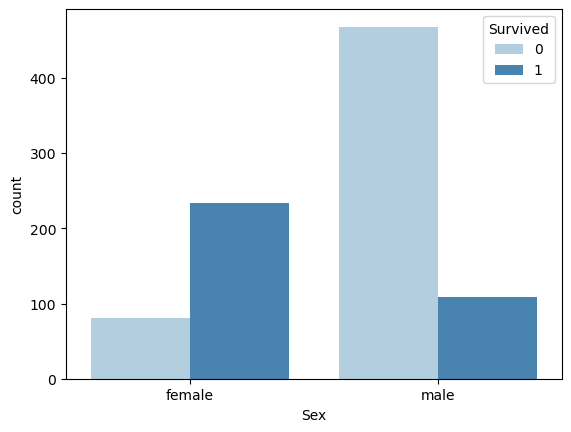

In [21]:
sns.countplot(data = train_df, x = 'Sex', hue = "Survived", palette = "Blues")

### Remaining categorical feature cols

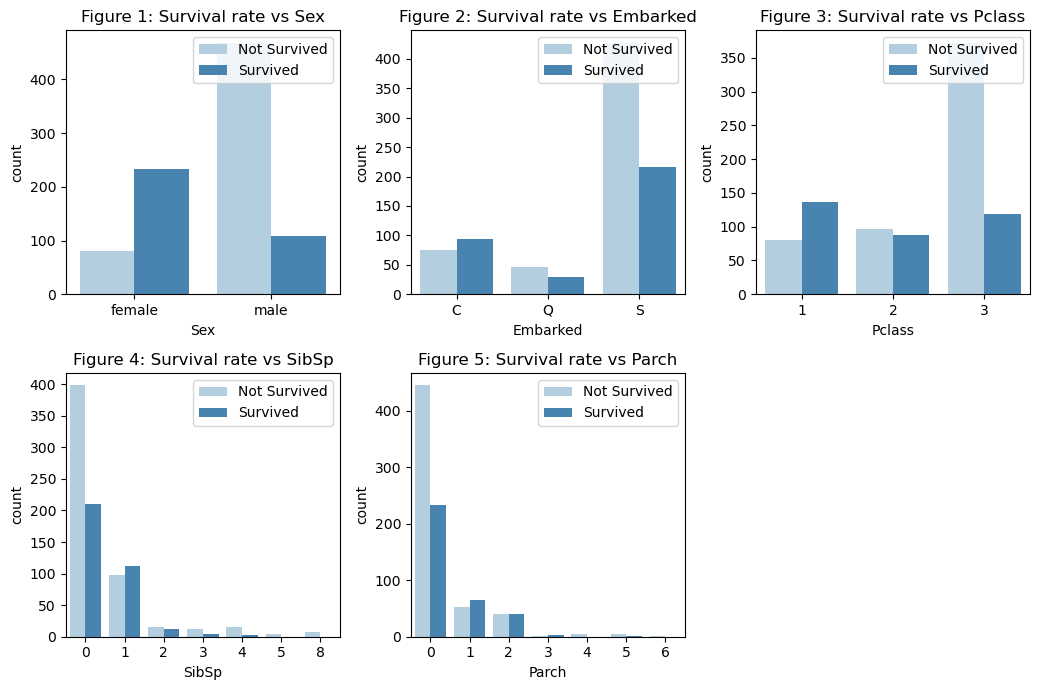

In [22]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.5, n_rows * 3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c #index to loop through the list cols
        if i < len(cols): 
            ax_i =ax[r,c] # 0,0 -> subplot 1     0,1 -> subplot 2, from left to right, up and down
            sns.countplot(data = train_df, x = cols[i], hue = "Survived", palette = "Blues", ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival rate vs {cols[i]}")
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not Survived', 'Survived'])
            
ax.flat[-1].set_visible(False) #remove fig 6         
plt.tight_layout()
plt.show()

### Observation
* Survival rate
* Fig 1: Female > Male
* Fig 2: Most peop embarked on S, and also has the highest peop not survived
* Fig 3: 1st class higher sur rate
* Fig 4: Peop going with 0 SibSp are mostly not sur. peop with 1-2 family mems has a better chance of sur
* Fig 5: Peop going with 0 Parch are mostly not sur
* Consider merge Parch 1 and SibSp to lower lower the complexity

### 3.2 EDA for numerical features 
* Numerical features: (continuous) Age, Fare
## Age

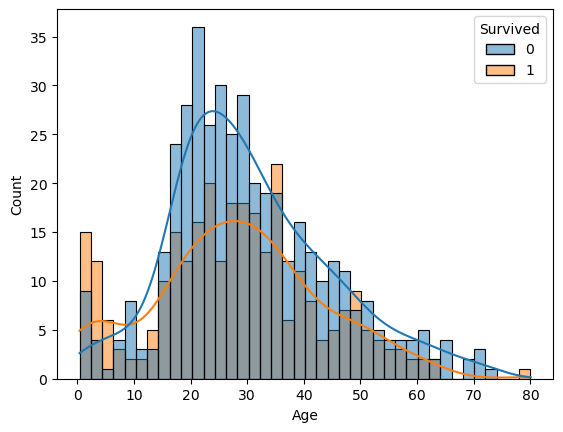

In [23]:
sns.histplot(data = train_df, x = 'Age', hue = "Survived", bins = 40, kde = True); #bins is cols

* Majority pass were from 18-40
* Child had more chance to survive than other ages

### Fare

In [24]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

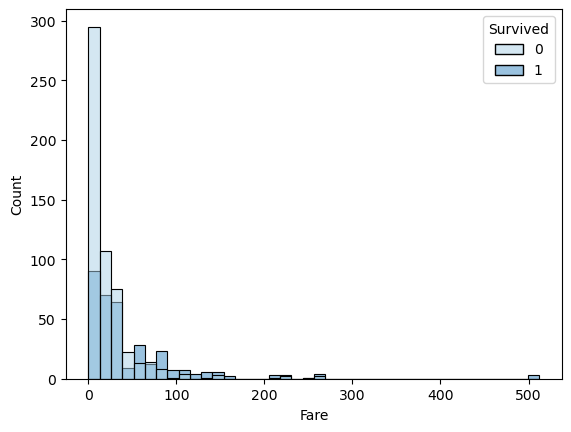

In [25]:
sns.histplot(data = train_df, x = 'Fare', hue = "Survived", bins = 40, palette = "Blues")

In [26]:
#Split to 4 quartiles, 0-25%, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
pd.qcut(train_df['Fare'], 4, labels = fare_categories)

PassengerId
1       Economic
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891     Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']

In [27]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: xlabel='Fare', ylabel='count'>

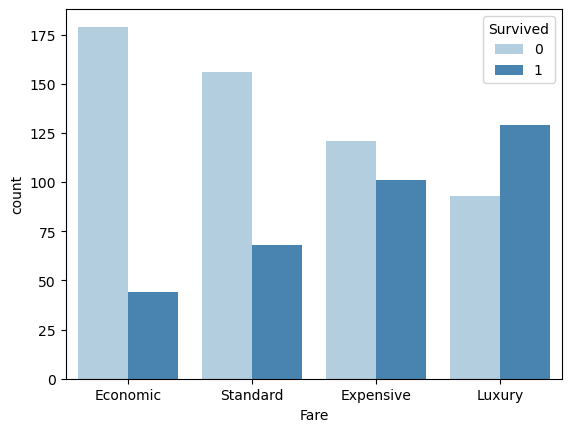

In [28]:
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x = quartile_data, hue = train_df["Survived"], palette = 'Blues')

* Pass with Expensive and Luxury Fare had more chance to survive

#### 4. Feature engineering and Data wrangling
* Feature engineering: Chuyển đổi dữ liệu thô ban đầu thành một tập thuộc tính(features) để có thể biểu diễn data tốt hơn
* Data wrangling(Sắp xếp dữ liệu): chuyển đổi dữ liệu thô thành dữ liệu sẵn sàng cho quá trình phân tích
  ### Col Name

In [29]:
train_df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

 ### Extract Name using ReGex
 ### Observe Name data, we realize some common structures like ", Mr./Mrs./Miss"
 using ReGex101.com

In [30]:
import re 
def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    if p.search(name) is None: 
        print(name)
    return p.search(name).groups(1)[0].strip()

train_df["Title"] = train_df['Name'].apply(lambda name : extract_title(name))

In [31]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [32]:
train_df[train_df["Name"].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [33]:
test_df['Title'] = test_df['Name'].apply(lambda name : extract_title(name))

In [34]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

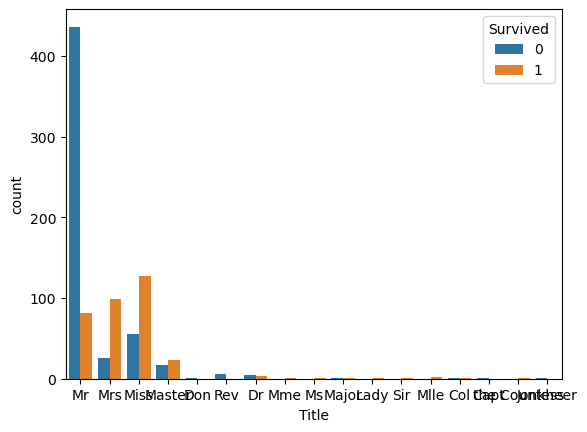

In [35]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived')


In [36]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']: 
        return title 
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
        

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [37]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [38]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

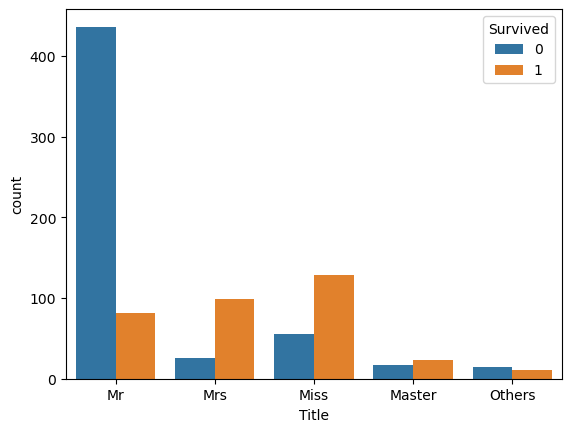

In [39]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived') 

 ### Family
 * 'SibSp', 'Parch' 

In [40]:
train_df['Family_Size'] = train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1

In [41]:
test_df['Family_Size'] = test_df['SibSp'].astype(int) + test_df['Parch'].astype(int) + 1

In [42]:
train_df['Fam_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo traveller', 'Small_Fam', 'Medium_Fam', 'Large_Fam'])    
#(0, 1]; (1, 4]; (4,6];
test_df['Fam_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo traveller', 'Small_Fam', 'Medium_Fam', 'Large_Fam'])    


<Axes: xlabel='Fam_Cat', ylabel='count'>

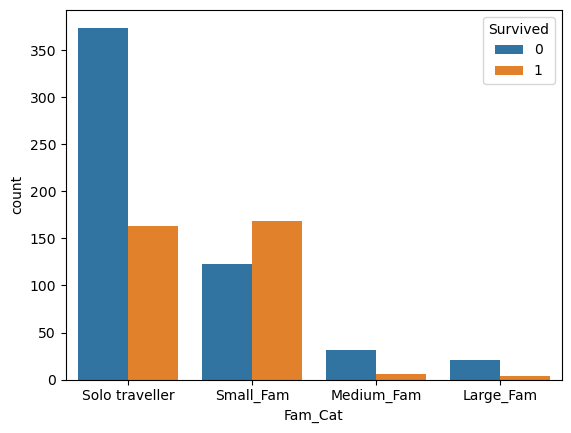

In [43]:
sns.countplot(data = train_df, x = 'Fam_Cat', hue = 'Survived')

### 4.2 Data wrangling

In [44]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked','Title', 'Fam_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Fam_Cat']


In [45]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols: 
        missing_cnt = df[col].isnull().sum()
        if missing_cnt > 0: 
            print(f"Col {col} has {missing_cnt*100/n_rows:.2f}% missing vals.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)     


Col Age has 19.87% missing vals.
Col Embarked has 0.22% missing vals.
Col Age has 20.57% missing vals.
Col Fare has 0.24% missing vals.


 ### Fill missing vals
 #### Age
 - Fill missing vals with 'median' of whole data set (Nhưng cũng ko phải phương pháp tối ưu do dataset bao gồm cả nam và nữ)
 - Group theo giới tính
 - Group theo Pclass


In [46]:
train_df['Age'].head()

PassengerId
1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
Name: Age, dtype: float64

In [47]:

age_by_sex_class = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

C:\Users\tuana\AppData\Local\Temp\ipykernel_1708\4019818143.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_class = train_df.groupby(['Sex', 'Pclass'])['Age'].median()


In [48]:
age_by_sex_class

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

#### Fill in missing vals with the above median vals of age group by sex and pclass

In [49]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

C:\Users\tuana\AppData\Local\Temp\ipykernel_1708\2707403057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [50]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
 

C:\Users\tuana\AppData\Local\Temp\ipykernel_1708\3035933817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [51]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Col Embarked has 0.22% missing vals.
Col Fare has 0.24% missing vals.


### Fill in Embarks and Fare

In [52]:
x = train_df[feature_cols]
y = train_df['Survived']

In [53]:
x_test = test_df[feature_cols]

In [54]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler    #OneHotEncoder for categorical, StandardScaler for numerical
from sklearn.impute import SimpleImputer   #strategy for filling missing data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
]) 
     

In [55]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features), 
    ('cat', cat_transformer, cat_features)
]) 

In [56]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Fam_Cat'])])

In [57]:
x = preprocessor.transform(x) #x -> x_train and x_validation
x_test = preprocessor.transform(x_test)

# 5.Model training 

In [58]:
from sklearn.model_selection import train_test_split  

In [59]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2)

In [60]:
x_train.shape, x_valid.shape

((712, 19), (179, 19))

In [61]:
x_test.shape

(418, 19)

### This is binany classification problem so 
### Logistic regression is quite good
### Hồi quy nhưng khi apply hàm logistic trên đó sẽ chuyển output của cta sang dạng probability


In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [63]:
log_reg = LogisticRegression( solver = 'liblinear', max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [64]:
log_reg.score(x_valid, y_valid)

0.8324022346368715

In [65]:
y_pred = log_reg.predict(x_valid)

In [66]:
precision_score(y_valid, y_pred), recall_score(y_valid, y_pred) 

(0.7402597402597403, 0.8507462686567164)

In [67]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       112
           1       0.74      0.85      0.79        67

    accuracy                           0.83       179
   macro avg       0.82      0.84      0.83       179
weighted avg       0.84      0.83      0.83       179



* Precision (Độ chính xác): Cho biết trong số các mẫu mà mô hình dự đoán là thuộc về một lớp cụ thể, tỷ lệ bao nhiêu mẫu thực sự thuộc về lớp đó.
* Recall (Độ phủ, Độ nhạy): Cho biết trong số tất cả các mẫu thực sự thuộc về một lớp cụ thể, tỷ lệ bao nhiêu mẫu được mô hình dự đoán đúng là thuộc về lớp đó.
* F1-score (Điểm F1): Là trung bình điều hòa (harmonic mean) của Precision và Recall. Nó cung cấp một chỉ số cân bằng giữa Precision và Recall.
* Support (Số lượng mẫu): Số lượng mẫu thực tế thuộc về mỗi lớp trong tập dữ liệu kiểm tra (hoặc tập dữ liệu được đánh giá). Support cho biết "mức độ phổ biến" của mỗi lớp trong tập dữ liệu đánh giá.
* linear model: y = ax1 + bx2 + bias -> y = ax1^2 + bx2^2 + cx1x2 + bias 

In [68]:
poly = PolynomialFeatures(degree = 2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_valid = poly.transform(x_valid)

In [69]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [70]:
poly_log_reg.score(poly_features_x_valid,y_valid)   # score đang thấp hơn so với khi chưa nâng bậc 

0.8100558659217877

### Test on Decision tree

In [71]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2025)
decision_tree.fit(x_train, y_train)         #-

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2025)

In [72]:
decision_tree.score(x_valid, y_valid)

0.8324022346368715

### Có thể log_reg hoạt động tốt hơn trên tập x_valid và y_valid so với polynomial_feature và decision_tree -> đánh giá không hoàn toàn chính xác 
### Cần có một phương pháp tốt hơn để tránh bias 

# 5.1 Cross validation 

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter = 12000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2025)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring = 'accuracy', cv = 5)  # automatically split x and y into 5 folds

In [75]:
lr_scores.mean(), lr_scores.std()   #standard deviation: Chênh lệch 

(np.float64(0.826031008725127), np.float64(0.020466357172416235))

In [76]:
dt_scores = cross_val_score(dt_cv, x, y, scoring = 'accuracy', cv = 5)

In [77]:
dt_scores.mean(), dt_scores.std()

(np.float64(0.8148389931579938), np.float64(0.01240557058523914))

# 5.2 Baseline model comparison

In [78]:
!pip show xgboost 

Name: xgboost
Version: 2.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\tuana\miniconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 


In [79]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [82]:
models = [KNeighborsClassifier(metric = 'minkowski', p = 2), 
          SVC(random_state = 2025), 
          LogisticRegression(solver = 'liblinear', max_iter = 12000), 
          DecisionTreeClassifier(random_state = 2025), 
          RandomForestClassifier(random_state = 2025), 
          ExtraTreesClassifier(), AdaBoostClassifier(), 
          XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 2025)
         ]

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 

def generate_baseline_results(models, x, y, metrics, cv = 5, plot_results = False):
    # define k-fold:
    kfold = StratifiedKFold(cv, shuffle = True, random_state=2025)
    entries = []
    for model in models: 
        model_name = model.__class__.__name__
        # model.fit(x, y)
        scores = cross_val_score(model, x, y, scoring=metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
           
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
        return cv_df
        
generate_baseline_results(models, x, y, metrics = 'accuracy', cv = 5, plot_results = True)

,model_name,fold_id,accuracy_score
0,KNeighborsClassifier,0,0.787709
1,KNeighborsClassifier,1,0.848315
2,KNeighborsClassifier,2,0.820225
3,KNeighborsClassifier,3,0.814607
4,KNeighborsClassifier,4,0.780899
